# Data Interaction Analysis

In [1]:
%matplotlib inline

In [2]:
import math
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [3]:
clf = pickle.load(open('boston_fitted_gbregr.pkl', 'rb'))
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                          'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
params = clf.get_params()

In [4]:
# make a check to see feature_names has the correct size
feature_importance = clf.feature_importances_
if len(feature_names) != feature_importance.shape[0]:
    raise ValueError("The passed feature_names is not valid. The order \
                      of the feature_names should match indices of the \
                      data the model was trained on.")
n_features = feature_importance.shape[0]

In [5]:
X_train = pickle.load(open('X_train.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl', 'rb'))

In [6]:
X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

<font color="blue">
## Analysis using Illumine

### Distribution of Node Predictions

In [15]:
from illumine import woodland
from illumine.woodland import dismantle_tree

In [113]:
leaf_values = woodland.get_tree_predictions(clf, X_test, adjust_with_base=False)
foliage = woodland.dismantle_ensemble(clf, feature_names=feature_names,
                                      display_relation=True)

In [9]:
def make_boxplot_ready(np_array, max_size=None):
    ready_data = []
    if max_size is None: end_num = leaf_values.shape[0]
    else: end_num = min(max_size, leaf_values.shape[0])

    for i in range(end_num):
        ready_data.append(leaf_values[i, :])
    return ready_data

In [115]:
leaf_bpformat = make_boxplot_ready(leaf_values)

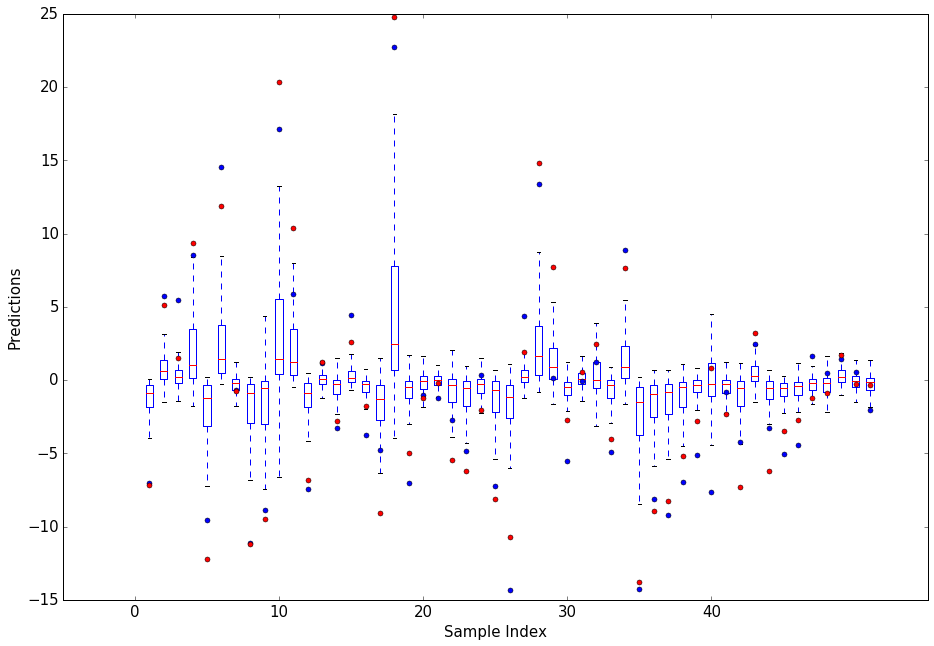

In [119]:
fig, ax = plt.subplots(1)
fig.set_size_inches(15.5, 10.5)
ax.boxplot(leaf_bpformat, showfliers=False)
ax.set_xticks(np.arange(0, 50, 10))
ax.set_xticklabels(np.arange(0, 50, 10))
ax.set_xlabel('Sample Index')
ax.set_ylabel('Predictions')
ax.set_xlim([-5, 55])
ax.plot(range(1, 52), y_test-clf.init_.predict(X_test).ravel(), 'o', ms=5)
ax.plot(range(1, 52), clf.predict(X_test)-clf.init_.predict(X_test).ravel(), 'ro', ms=5)


for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

plt.show()

### Unique Nodes

In [29]:
unique_node_cnts = dict()
n_total_nodes = 0

for estimator in clf.estimators_:
    estimator = estimator.ravel()[0]
    estimator_nodes = dismantle_tree(estimator, feature_names,
                                     display_relation=True)
    
    for node in estimator_nodes.values():
        n_total_nodes += 1
        node_path = node.path.__str__()  # convert to str to hash
        unique_node_cnts[node_path] = \
            unique_node_cnts.get(node_path, 0) + 1
        cumsum_node_values[node_path] = \
            cumsum_node_values.get(node_path, 0) + node.value
        
for key, val in cumsum_node_values.items():
    mean_node_values[key] = round(val / unique_node_cnts[key], 3)

In [30]:
print("The ratio of unique nodes to total # of nodes is {:0.3f}"
      .format(len(unique_node_cnts) / n_total_nodes))

The ratio of unique nodes to total # of nodes is 0.360


some testing

In [83]:
clf.apply(X_test).shape

(51, 500)

In [84]:
clf.apply(X_test)

array([[ 12.,  12.,  12., ...,  28.,  14.,  30.],
       [  8.,   8.,   8., ...,   6.,  14.,  27.],
       [  7.,   7.,   7., ...,   6.,  14.,   8.],
       ..., 
       [  7.,   7.,   7., ...,   6.,  14.,   5.],
       [  7.,   7.,   7., ...,   6.,  14.,  30.],
       [  7.,   7.,   7., ...,  10.,  14.,  29.]])

In [96]:
clf.estimators_[497][0].tree_.value.ravel()[28]

-0.32525645558016242

In [93]:
woodland.get_tree_predictions(clf, X_test, adjust_with_base=False)

array([[-6.83101648, -6.76270632, -6.69507926, ..., -0.32525646,
         0.04446279, -0.02282664],
       [ 4.80541969,  4.75736549,  4.70979183, ...,  0.71409151,
         0.04446279,  0.33805429],
       [-1.00260739, -0.99258132, -0.98265551, ...,  0.71409151,
         0.04446279,  0.86633873],
       ..., 
       [-1.00260739, -0.99258132, -0.98265551, ...,  0.71409151,
         0.04446279,  0.72432702],
       [-1.00260739, -0.99258132, -0.98265551, ...,  0.71409151,
         0.04446279, -0.02282664],
       [-1.00260739, -0.99258132, -0.98265551, ..., -0.04773214,
         0.04446279, -0.69660788]])

In [85]:
leaf_values

array([[ 15.8125    ,  15.88081016,  15.94843723, ...,  22.31826003,
         22.68797927,  22.62068984],
       [ 27.44893617,  27.40088197,  27.35330832, ...,  23.35760799,
         22.68797927,  22.98157077],
       [ 21.64090909,  21.65093516,  21.66086098, ...,  23.35760799,
         22.68797927,  23.50985521],
       ..., 
       [ 21.64090909,  21.65093516,  21.66086098, ...,  23.35760799,
         22.68797927,  23.3678435 ],
       [ 21.64090909,  21.65093516,  21.66086098, ...,  23.35760799,
         22.68797927,  22.62068984],
       [ 21.64090909,  21.65093516,  21.66086098, ...,  22.59578434,
         22.68797927,  21.94690861]])

### Analysis of most Valuable Nodes

In [ ]:
ensemble_estimator_nodes = []

for estimator in clf.estimators_:
    estimator = estimator.ravel()[0]
    estimator_nodes = dismantle_tree(estimator, feature_names,
                                     display_relation=True)
    
    for node in estimator_nodes.values():
        ensemble_estimator_nodes.append(estimator_nodes)        
        k


In [ ]:
# First find the tree's associated with prediction values
# is closest to the real value

